## Import

In [1]:
import yfinance as yf
import pandas as pd
import datetime
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scripts.yahoofinanse_downloader import YFinanceDownloader

In [2]:
df_news = pd.read_csv("csv/BA_full_agg.csv")

In [3]:
ticker_list = ['^GSPC', 'EURUSD=X', 'BA',"NFLX","BTC-USD"]
begin_date = "20200901"
end_date = "20231124"

yfd = YFinanceDownloader(ticker_list,begin_date,end_date)

df = yfd.create_df()

[*********************100%%**********************]  1 of 1 completed
Ticker data downloaded correctly
[*********************100%%**********************]  1 of 1 completed
Ticker data downloaded correctly
[*********************100%%**********************]  1 of 1 completed
Ticker data downloaded correctly
[*********************100%%**********************]  1 of 1 completed
Ticker data downloaded correctly
[*********************100%%**********************]  1 of 1 completed
Ticker data downloaded correctly


In [7]:
df.to_csv("d.csv")

In [ ]:
df_news['day'] = pd.to_datetime(df_news['day'])
df['Date'] = pd.to_datetime(df['Date'])

df_full = pd.merge(df_news, df, left_on='day',right_on='Date', how='right')

In [ ]:
df_full.tail(5)

,Unnamed: 0,day,future,influential,trustworthy,not clickbait,finbert_Score,bart_Score,vader_Score,future_finbert,...,EURUSD=X_Close,EURUSD=X_Adj Close,EURUSD=X_Volume,BA_Open,BA_High,BA_Low,BA_Close,BA_Adj Close,BA_Volume,is_weekend
1053,817.0,2023-11-20,0.272856,0.974173,0.831511,0.404557,0.333699,0.522658,0.65024,0.072376,...,1.090703,1.090703,0.0,211.009995,218.880005,210.940002,217.710007,217.710007,11568100.0,False
1054,818.0,2023-11-21,0.181532,0.991608,0.948953,0.371553,0.578798,0.949727,0.69140,0.130884,...,1.094595,1.094595,0.0,216.500000,219.380005,216.070007,218.270004,218.270004,5362100.0,False
1055,819.0,2023-11-22,0.406208,0.940190,0.918550,0.268571,0.077828,0.508711,0.49390,0.031614,...,1.091822,1.091822,0.0,218.000000,221.500000,217.699997,219.910004,219.910004,5384400.0,False
1056,820.0,2023-11-23,0.281758,0.986497,0.950668,0.456025,0.735246,0.892426,-0.08400,0.207115,...,1.089087,1.089087,0.0,NaN,NaN,NaN,NaN,NaN,NaN,False
1057,821.0,2023-11-24,0.287800,0.977845,0.949522,0.353708,0.472922,0.617432,0.88725,0.145961,...,1.090631,1.090631,0.0,220.610001,221.589996,218.960007,220.000000,220.000000,2312100.0,False


In [ ]:
df_full.columns

Index(['Unnamed: 0', 'day', 'future', 'influential', 'trustworthy',
       'not clickbait', 'finbert_Score', 'bart_Score', 'vader_Score',
       'future_finbert', 'future_bart', 'future_vader', 'influential_finbert',
       'influential_bart', 'influential_vader', 'trustworthy_finbert',
       'trustworthy_bart', 'trustworthy_vader', 'clickbait_finbert',
       'clickbait_bart', 'clickbait_vader', 'Date', '^GSPC_Open', '^GSPC_High',
       '^GSPC_Low', '^GSPC_Close', '^GSPC_Adj Close', '^GSPC_Volume',
       'EURUSD=X_Open', 'EURUSD=X_High', 'EURUSD=X_Low', 'EURUSD=X_Close',
       'EURUSD=X_Adj Close', 'EURUSD=X_Volume', 'BA_Open', 'BA_High', 'BA_Low',
       'BA_Close', 'BA_Adj Close', 'BA_Volume', 'is_weekend'],
      dtype='object')

In [ ]:
df_full.drop(columns=['is_weekend','Unnamed: 0','day',
                      'EURUSD=X_Volume','EURUSD=X_Open','EURUSD=X_High',
                      'EURUSD=X_Low','^GSPC_Adj Close','EURUSD=X_Adj Close']
             ,inplace=True)

In [ ]:
df_full.loc[:,['future', 'influential', 'trustworthy', 'not clickbait',
       'finbert_Score', 'bart_Score', 'vader_Score', 'future_finbert',
       'future_bart', 'future_vader', 'influential_finbert',
       'influential_bart', 'influential_vader', 'trustworthy_finbert',
       'trustworthy_bart', 'trustworthy_vader', 'clickbait_finbert',
       'clickbait_bart', 'clickbait_vader']] = replace_with_0(df_full,['future', 'influential', 'trustworthy', 'not clickbait',
       'finbert_Score', 'bart_Score', 'vader_Score', 'future_finbert',
       'future_bart', 'future_vader', 'influential_finbert',
       'influential_bart', 'influential_vader', 'trustworthy_finbert',
       'trustworthy_bart', 'trustworthy_vader', 'clickbait_finbert',
       'clickbait_bart', 'clickbait_vader'])

In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 0 to 1057
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   future               1058 non-null   float64       
 1   influential          1058 non-null   float64       
 2   trustworthy          1058 non-null   float64       
 3   not clickbait        1058 non-null   float64       
 4   finbert_Score        1058 non-null   float64       
 5   bart_Score           1058 non-null   float64       
 6   vader_Score          1058 non-null   float64       
 7   future_finbert       1058 non-null   float64       
 8   future_bart          1058 non-null   float64       
 9   future_vader         1058 non-null   float64       
 10  influential_finbert  1058 non-null   float64       
 11  influential_bart     1058 non-null   float64       
 12  influential_vader    1058 non-null   float64       
 13  trustworthy_finbert  1058 non-nul

## Apply

In [ ]:
df_full.shape

(455, 19)

In [ ]:
stock_data = df_full

In [ ]:
stock_data = forward_fill_columns(stock_data,['^GSPC_Open', '^GSPC_High', '^GSPC_Low', '^GSPC_Close',
       '^GSPC_Volume', 'EURUSD=X_Close', 'BA_Open', 'BA_High', 'BA_Low',
       'BA_Close', 'BA_Volume'])

stock_data = replace_with_0(stock_data, ['ticker_0.15', 'ticker_0.5', 'ticker_0.85',
       'overall_0.15', 'overall_0.5', 'overall_0.85', 'number_of_cases'])

stock_data = apply_weighted_weekend_news(stock_data, 'Date', ['ticker_0.15', 'ticker_0.5', 'ticker_0.85',
       'overall_0.15', 'overall_0.5', 'overall_0.85','number_of_cases'], weights=[0.5,1,0.5])

stock_data.reset_index(drop=True,inplace=True)
stock_data = get_calculated_features(stock_data, 'Date','BA_Open', 'BA_High', 'BA_Low', 'BA_Close','BA_Volume')

cols_min_max = ['^GSPC_Open','^GSPC_High','^GSPC_Low','^GSPC_Close',
       '^GSPC_Volume','EURUSD=X_Close','BA_Open','BA_High','BA_Low',
       'BA_Close','BA_Volume','Daily_Variation','High_Close_Pressure',
          'Low_Open_Pressure','Amount','number_of_cases','Price_Change']
stock_data.loc[:300,cols_min_max], scaler = min_max_scale(stock_data.loc[:300], cols_min_max, train_data=True)

stock_data.loc[301:,cols_min_max] = min_max_scale(stock_data.loc[301:], cols_min_max, False,scaler)


In [ ]:
stock_data.head()

,Date,^GSPC_Open,^GSPC_High,^GSPC_Low,^GSPC_Close,^GSPC_Volume,EURUSD=X_Close,BA_Open,BA_High,BA_Low,...,overall_0.85,number_of_cases,Daily_Variation,High_Close_Pressure,Low_Open_Pressure,Amount,Price_Change,weekday,Year_Progress,Month_Progress
0,2022-08-01,0.549230,0.537293,0.558859,0.535215,0.326413,0.372886,0.375673,0.393470,0.371905,...,0.272818,0.702941,0.320017,0.145787,0.898492,0.494487,NaN,0.00,0.666667,0.03
1,2022-08-02,0.541651,0.532807,0.543872,0.508098,0.395047,0.405241,0.384648,0.355807,0.362362,...,0.230645,0.058824,0.141192,0.218115,0.770965,0.247381,0.224159,0.25,0.666667,0.06
2,2022-08-03,0.545130,0.560031,0.569899,0.571324,0.345889,0.340864,0.363364,0.357422,0.355399,...,0.208560,0.050000,0.198467,0.048111,0.868691,0.124480,0.514267,0.50,0.666667,0.10
3,2022-08-04,0.588632,0.553653,0.595288,0.568132,0.336940,0.342057,0.374135,0.362523,0.373281,...,0.202386,0.050000,0.117164,0.087893,0.918705,0.072350,0.403297,0.75,0.666667,0.13
4,2022-08-05,0.552468,0.543931,0.569298,0.561462,0.311132,0.396977,0.362424,0.353596,0.369154,...,0.228841,0.016912,0.088072,0.111057,0.971671,0.060780,0.361445,1.00,0.666667,0.16


## PCA

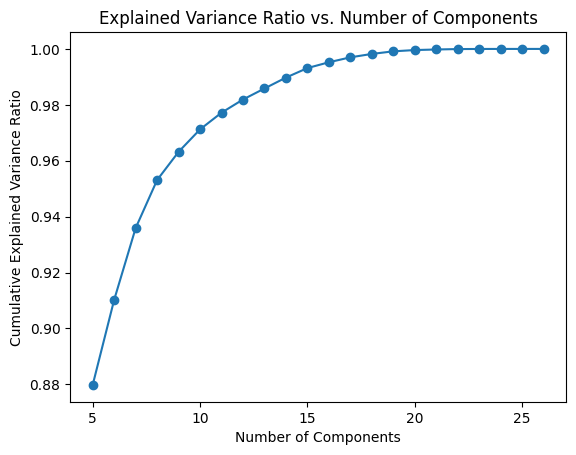

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

np.random.seed(30)
X = stock_data.drop(columns=['Date'])[1:]

# Try different values of n_components
num_components_to_try = X.shape[1]  # Try up to the number of features
explained_variances = []

for n_components in range(5, num_components_to_try + 1):
    # Create the PCA model
    pca = PCA(n_components=n_components)

    # Fit and transform the features using PCA
    X_pca = pca.fit_transform(X)

    # Get the explained variance ratio and append it to the list
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

# Plot the explained variance ratio for different numbers of components
plt.plot(range(5, num_components_to_try + 1), explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()


## FB Prophet

In [ ]:
from prophet import Prophet

In [ ]:
df_prophet = df_full.copy()
cols = df_prophet.drop(columns=['Date']).columns
df_prophet = forward_fill_columns(df_prophet,cols)
df_prophet.rename(columns={"Date":"ds"},inplace=True)

df_prophet['y'] = df_prophet['BA_Close'].shift(-1)
df_prophet['Amount'] = df_prophet['BA_Volume'] * df_prophet['BA_Close']
cols = ['BA_Close','^GSPC_Close','BA_Open','BA_High','BA_Low','EURUSD=X_Close']

train = df_prophet.loc[3:800,['ds','y']+cols]
test = df_prophet.loc[801:,['ds','y']+cols]

m = Prophet()
for col in cols:
  m.add_regressor(col)

m.fit(train)

forecast = m.predict(test)
forecast['y'] = test.reset_index(drop=True)['y']
forecast_t = m.predict(train)
forecast_t['y'] = train.reset_index(drop=True)['y']
print('train mae: ', (abs(forecast_t['y']-forecast_t['yhat']).mean()))
print('train mse: ', (np.square((forecast_t['y']-forecast_t['yhat'])).mean()))
print('test mae: ', (abs(forecast['y']-forecast['yhat']).mean()))
print('test mse: ', (np.square((forecast['y']-forecast['yhat'])).mean()))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp62sgejvt/1p_918ew.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp62sgejvt/9_ny0cl9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2628', 'data', 'file=/tmp/tmp62sgejvt/1p_918ew.json', 'init=/tmp/tmp62sgejvt/9_ny0cl9.json', 'output', 'file=/tmp/tmp62sgejvt/prophet_modeltc4es9_x/prophet_model-20231129181623.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:16:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:16:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


train mae:  2.5887224916330793
train mse:  14.30712272722248
test mae:  2.6183858733771945
test mse:  12.238470423230332


In [ ]:
print('when added a 2')
print('test mae: ', (abs(forecast['y']-(forecast['yhat']+2)).mean()))
print('test mse: ', (np.square((forecast['y']-(forecast['yhat']+2))).mean()))

when added a 2
test mae:  2.118503640536287
test mse:  10.054663041618905


In [ ]:
forecast[['y','yhat']].head()

,y,yhat
0,207.279999,204.991918
1,198.210007,208.492773
2,203.190002,200.022123
3,201.050003,203.734310
4,201.050003,202.687072


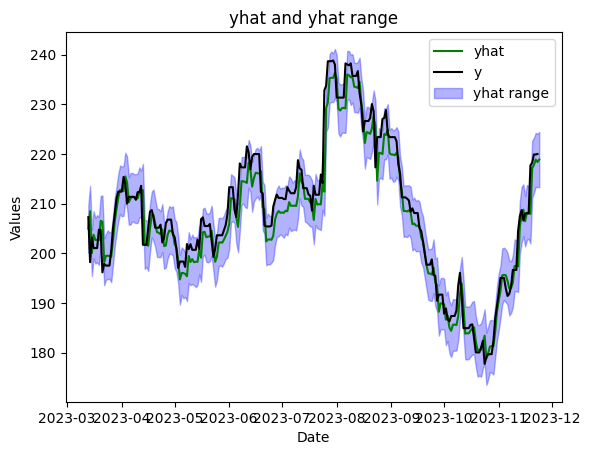

In [ ]:
import matplotlib.pyplot as plt
df1 = forecast
plt.plot(df1['ds'], df1['yhat'], label='yhat', color='green')
plt.plot(df1['ds'], df1['y'], label='y', color='black')

plt.fill_between(df1['ds'], df1['yhat_lower'], df1['yhat_upper'], color='blue', alpha=0.3, label='yhat range')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('yhat and yhat range')
plt.legend()
plt.show()

In [ ]:
# add prophet columns
df_prophet2 = m.predict(df_prophet[3:])

In [ ]:
df_full2 = pd.merge(df_prophet[3:], df_prophet2, left_on='ds',right_on='ds', how='left',suffixes=('', '_y'))

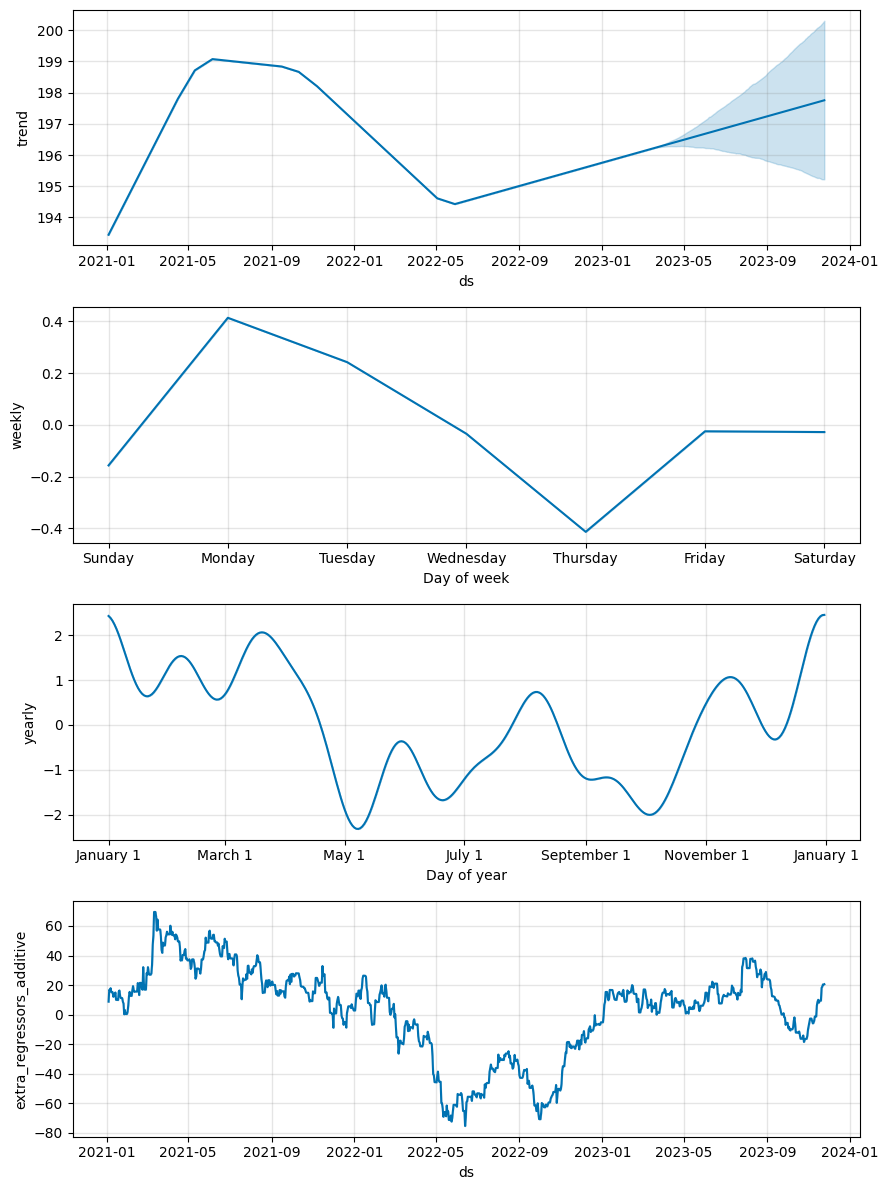

In [ ]:
fig2 = m.plot_components(df_prophet2)

## Train/Test

In [ ]:
news_cols = ['future', 'influential', 'trustworthy', 'not clickbait',
       'finbert_Score', 'bart_Score', 'vader_Score', 'future_finbert',
       'future_bart', 'future_vader', 'influential_finbert',
       'influential_bart', 'influential_vader', 'trustworthy_finbert',
       'trustworthy_bart', 'trustworthy_vader', 'clickbait_finbert',
       'clickbait_bart', 'clickbait_vader']

df_full2 = apply_weighted_weekend_news(df_full2, 'ds', news_cols , [1,1,0.2])

df_full2.reset_index(drop=True,inplace=True)
df_full2 = get_calculated_features(df_full2, 'ds','BA_Open', 'BA_High', 'BA_Low', 'BA_Close','BA_Volume')

<ipython-input-20-20f64aa79565>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Daily_Variation'] = (df[high_col] - df[low_col]) / df[open_col]
<ipython-input-20-20f64aa79565>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['High_Close_Pressure'] = (df[high_col] - df[close_col]) / df[open_col]
<ipython-input-20-20f64aa79565>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
df_full2.columns

Index(['future', 'influential', 'trustworthy', 'not clickbait',
       'finbert_Score', 'bart_Score', 'vader_Score', 'future_finbert',
       'future_bart', 'future_vader', 'influential_finbert',
       'influential_bart', 'influential_vader', 'trustworthy_finbert',
       'trustworthy_bart', 'trustworthy_vader', 'clickbait_finbert',
       'clickbait_bart', 'clickbait_vader', 'ds', '^GSPC_Open', '^GSPC_High',
       '^GSPC_Low', '^GSPC_Close', '^GSPC_Volume', 'EURUSD=X_Close', 'BA_Open',
       'BA_High', 'BA_Low', 'BA_Close', 'BA_Adj Close', 'BA_Volume', 'y',
       'Amount', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower',
       'trend_upper', 'BA_Close_y', 'BA_Close_lower', 'BA_Close_upper',
       'BA_High_y', 'BA_High_lower', 'BA_High_upper', 'BA_Low_y',
       'BA_Low_lower', 'BA_Low_upper', 'BA_Open_y', 'BA_Open_lower',
       'BA_Open_upper', 'EURUSD=X_Close_y', 'EURUSD=X_Close_lower',
       'EURUSD=X_Close_upper', '^GSPC_Close_y', '^GSPC_Close_lower',
       '^GSPC_Close

In [ ]:
split_date = pd.datetime(2023,3,12) #taki był dla prophet

df_training = df_full2.loc[df_full2['ds'] <= split_date]
df_test = df_full2.loc[df_full2['ds'] > split_date]

<ipython-input-48-f29886aede5f>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  split_date = pd.datetime(2023,3,12) #taki był dla prophet


In [ ]:
cols_min_max = ['Amount','^GSPC_Close','trend','Daily_Variation', 'High_Close_Pressure',
       'Low_Open_Pressure', 'Price_Change','^GSPC_Open','^GSPC_Volume','^GSPC_High',
                        '^GSPC_Low','BA_Adj Close','BA_Volume']
df_training.loc[:,['min_max_'+col for col in cols_min_max]],scaler_min_max = min_max_scale(df_training, cols_min_max, train_data=True, scaler=None)

<ipython-input-49-3f69d413ada4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_training.loc[:,['min_max_'+col for col in cols_min_max]],scaler_min_max = min_max_scale(df_training, cols_min_max, train_data=True, scaler=None)


In [ ]:
df_test.loc[:,['min_max_'+col for col in cols_min_max]] = min_max_scale(df_test, cols_min_max, train_data=False, scaler=scaler_min_max)

<ipython-input-50-6ab6df941ace>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:,['min_max_'+col for col in cols_min_max]] = min_max_scale(df_test, cols_min_max, train_data=False, scaler=scaler_min_max)


## Korelacje

### korelacje

In [ ]:
abs(df_training['Price_Change']).mean()

3.4648329428084494

In [ ]:
df_training.loc[:,'y_change'] = df_training['Price_Change'].shift(-1)

In [ ]:
correlation_matrix = df_training.drop(columns=['ds']).corr()
correlation_with_target = correlation_matrix['y_change'].sort_values(ascending=False)
print(correlation_with_target[correlation_with_target>0.1])
print(correlation_with_target[correlation_with_target<-0.1])

y_change             1.000000
^GSPC_Close_upper    0.113002
^GSPC_Close_lower    0.113002
^GSPC_Close_y        0.113002
Name: y_change, dtype: float64
min_max_^GSPC_High    -0.109544
^GSPC_High            -0.109544
^GSPC_Open            -0.111650
min_max_^GSPC_Open    -0.111650
min_max_^GSPC_Low     -0.111743
^GSPC_Low             -0.111743
min_max_^GSPC_Close   -0.113002
^GSPC_Close           -0.113002
Name: y_change, dtype: float64


In [ ]:
correlation_matrix = df_training.drop(columns=['ds']).corr()
correlation_with_target = correlation_matrix['y'].sort_values(ascending=False)
print(correlation_with_target[correlation_with_target>0.2])
print(correlation_with_target[correlation_with_target<-0.2])

y                                  1.000000
yhat_lower                         0.993671
yhat                               0.993667
yhat_upper                         0.993667
additive_terms_upper               0.993058
additive_terms_lower               0.993058
additive_terms                     0.993058
extra_regressors_additive_upper    0.993036
extra_regressors_additive_lower    0.993036
extra_regressors_additive          0.993036
BA_Close_upper                     0.993029
BA_Close_lower                     0.993029
BA_Close_y                         0.993029
BA_Adj Close                       0.993029
BA_Close                           0.993029
min_max_BA_Adj Close               0.993029
BA_Low_y                           0.990606
BA_Low_lower                       0.990606
BA_Low_upper                       0.990606
BA_Low                             0.990606
BA_High                            0.990568
BA_Open_lower                      0.987126
BA_Open_y                       

### testy

In [ ]:
import statsmodels.api as sm

X = df_training[1:-1].drop(['ds', 'y_change','y'], axis=1)
y = df_training[1:-1]['y_change']

X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Display summary statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               y_change   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     2.502
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           2.37e-06
Time:                        21:34:45   Log-Likelihood:                -1630.1
No. Observations:                 568   AIC:                             3342.
Df Residuals:                     527   BIC:                             3520.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
X = df_training[1:-1].drop(['ds', 'y_change','y'], axis=1)
y = df_training[1:-1]['y']

X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Display summary statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1109.
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:37:07   Log-Likelihood:                -1572.6
No. Observations:                 568   AIC:                             3227.
Df Residuals:                     527   BIC:                             3405.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D, InputLayer
from keras.losses import Huber
import tensorflow as tf
import matplotlib.pyplot as plt


In [105]:
cols_sc = [
    'BA_Open','BA_High','BA_Low',
    'BA_Close','yhat_lower','yhat_upper']
min_sc = (np.array(df_training[cols_sc])).min()
max_sc = (np.array(df_training[cols_sc])).max()

df_training[cols_sc] = (df_training[cols_sc] - min_sc)/max_sc
df_test[cols_sc] = (df_test[cols_sc] - min_sc)/max_sc

<ipython-input-105-268a89c0ecf9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_training[cols_sc] = (df_training[cols_sc] - min_sc)/max_sc
<ipython-input-105-268a89c0ecf9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[cols_sc] = (df_test[cols_sc] - min_sc)/max_sc


In [8]:
news_cols = [
    #'future',
 #'influential',
 #'trustworthy'
#  'not clickbait',
#   'finbert_Score', 'influential_finbert', 'future_finbert','trustworthy_finbert','clickbait_finbert',
  #  'bart_Score','influential_bart','future_bart','trustworthy_bart', 'clickbait_bart',
#  'vader_Score','future_vader','trustworthy_vader','clickbait_vader','influential_vader'

 ]

In [9]:
cols = [
    #'min_max_High_Close_Pressure','min_max_Daily_Variation',
    #'yhat_lower','yhat_upper',
        #'min_max_Low_Open_Pressure',
        #'yearly',
#'min_max_Amount','min_max_trend',
   # 'EURUSD=X_Close',
    #    '^GSPC_Close',
   'BA_Open','BA_High','BA_Low',
'BA_Close',
    'ds']+news_cols

df_training1 = df_training[cols]
df_test1 = df_test[cols]
df_test1.reset_index(inplace=True,drop=True)

NameError: ignored

In [224]:
df_training1['y'] = df_training1['BA_Close'].shift(-1)
df_training1 = df_training1[:-1]
df_test1['y'] = df_test1['BA_Close'].shift(-1)
df_test1 = df_test1[:-1]


<ipython-input-224-a153d56bfdb7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_training1['y'] = df_training1['BA_Close'].shift(-1)
<ipython-input-224-a153d56bfdb7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test1['y'] = df_test1['BA_Close'].shift(-1)


In [108]:
def create_X_y(df_,hops,y_col,date_col=None):
  X_ = []
  y_ = []
  df_t = df_.drop(columns=[date_col,y_col])
  for i in range(hops,df_.shape[0]):
    X_.append(df_t[i-hops:i])
    y_.append(df_[y_col][i])

  X_, y_ = np.array(X_), np.array(y_)
  X_ = np.reshape(X_,(X_.shape[0],X_.shape[1],X_.shape[2]))

  return X_ ,y_

In [225]:
X_train, y_train = create_X_y(df_training1,10,'y','ds')

In [226]:
X_test, y_test = create_X_y(df_test1,10,'y','ds')

In [227]:
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Conv1D(filters=32, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      ))

#model.add(Dropout(0.3))
model.add(LSTM(units=25,return_sequences=True))
#model.add(Dropout(0.3))
model.add(LSTM(units=25,return_sequences=False))
model.add(Dense(10, activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

In [232]:
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
18/18 [==============================] - 0s 12ms/step - loss: 5.9907e-04
Epoch 2/100
18/18 [==============================] - 0s 13ms/step - loss: 5.9984e-04
Epoch 3/100
18/18 [==============================] - 0s 12ms/step - loss: 6.3740e-04
Epoch 4/100
18/18 [==============================] - 0s 12ms/step - loss: 5.8530e-04
Epoch 5/100
18/18 [==============================] - 0s 14ms/step - loss: 6.8983e-04
Epoch 6/100
18/18 [==============================] - 0s 12ms/step - loss: 6.3520e-04
Epoch 7/100
18/18 [==============================] - 0s 12ms/step - loss: 6.5413e-04
Epoch 8/100
18/18 [==============================] - 0s 13ms/step - loss: 6.4219e-04
Epoch 9/100
18/18 [==============================] - 0s 12ms/step - loss: 6.2678e-04
Epoch 10/100
18/18 [==============================] - 0s 13ms/step - loss: 5.7883e-04
Epoch 11/100
18/18 [==============================] - 0s 13ms/step - loss: 5.8796e-04
Epoch 12/100
18/18 [==============================] - 0s 12ms/s

In [233]:
y_pred = model.predict(X_test)

6/6 [==============================] - 0s 4ms/step


In [234]:
y_pred = (y_pred*max_sc)+min_sc
y = (y_test*max_sc)+min_sc
y_pred_list = [i[0] for i in y_pred]

In [235]:
np.square(y_pred_list-y).mean()

40.518866412779154

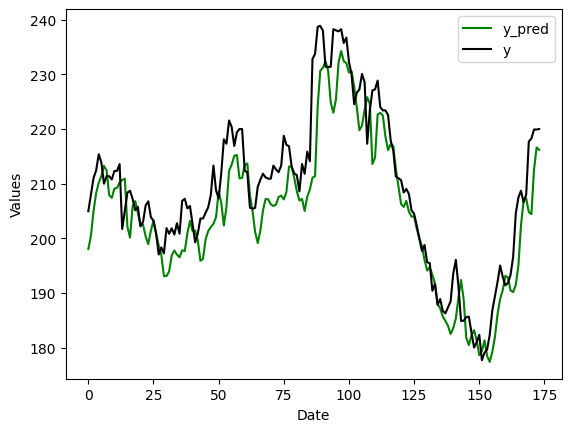

In [236]:
import matplotlib.pyplot as plt
df1 = df_test

x = [i for i in range(df_test.shape[0]-10-1)]
plt.plot(x, y_pred_list, label='y_pred', color='green')
plt.plot(x, y, label='y', color='black')


plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()

In [160]:
import pandas as pd
import numpy as np

# Assuming you have two arrays: y_test and y_pred_list
#make it
# Calculate the correlation between y_test and y_pred_list
df2 = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred_list})

correlation = df2['y_test'].corr(df2['y_pred'])

# Print the correlation value
print("Correlation:", correlation)

Correlation: 0.9706787628702978
